In [74]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py

'''
This is a cell to plot an interactive chart of BTC price data using plotly
'''

df = pd.read_csv("./data/price_data/BTC_price.csv")


df.head()
trace_btc = go.Scatter(
    x=df.time,
    y=df['close'],
    name = "BTC price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

data = [trace_btc]

layout = dict(
    title='BTC  Price Interactive Chart', 
    xaxis=dict(
        title = 'Time',
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'),
    yaxis=dict(
        title="Price (US Dollar)",
    
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "BTC Price Interactive Chart")
plotly.offline.plot(fig, filename='./visualization/BTC_interactive_plot.html')

'./visualization/BTC_interactive_plot.html'

In [168]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py

'''
This is a cell to plot an interactive chart of forum sentiment using plotly
'''

df1 = pd.read_csv('./data/senti_analysis/transformer_sentiment/bitcoin_FTXtrans_sentiment.csv')
df2 = pd.read_csv('./data/senti_analysis/transformer_sentiment/cryptocurrency_FTXtrans_sentiment.csv')
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
start_date = dt.datetime(2022, 11, 1).timestamp()
end_date = dt.datetime(2022, 11, 23).timestamp()
print(start_date)
df1 = df1[df1['time'] >= start_date]
df1 = df1[df1['time'] <= end_date]
df1['time'] = df1['time'] //3600 * 3600
df1 = df1.groupby('time').mean()
df2 = df2[df2['time'] >= start_date]
df2 = df2[df2['time'] <= end_date]
df2['time'] = df2['time'] //3600 * 3600
df2 = df2.groupby('time').mean()

df = df1.merge(df2, on='time', suffixes=('_btc', '_crypto'))
df.index = pd.to_datetime(df.index, unit='s')

df.head()
import plotly.graph_objs as go
figure = go.Figure()
trace_btc = go.Scatter(
    x= df.index,
    y=df['compound_btc'],
    name = "r/bitcoin",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_e = go.Scatter(
    x= df.index,
    y=df['compound_crypto'],
    name = "r/cryptocurrency" ,
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_btc, trace_e]

layout = dict(
    title='BTC & crypto sentiment Interactive Chart', 
    xaxis=dict(
        title = "Time",
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    ),
    yaxis=dict(
        title="Sentiment Score"
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "BTC & crypto sentiment Interactive Chart")
plotly.offline.plot(fig, filename='./visualization/BTC & crypto sentiment Interactive Chart.html')

1667286000.0


'./visualization/BTC & crypto sentiment Interactive Chart.html'

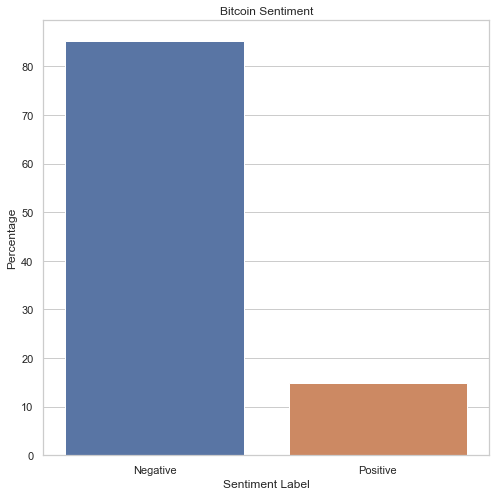

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('./data/senti_analysis/transformer_sentiment/bitcoin_FTXtrans_sentiment.csv')
counts = df.label.value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_title('Bitcoin Sentiment')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel('Sentiment Label')
ax.set_ylabel("Percentage")
plt.show()


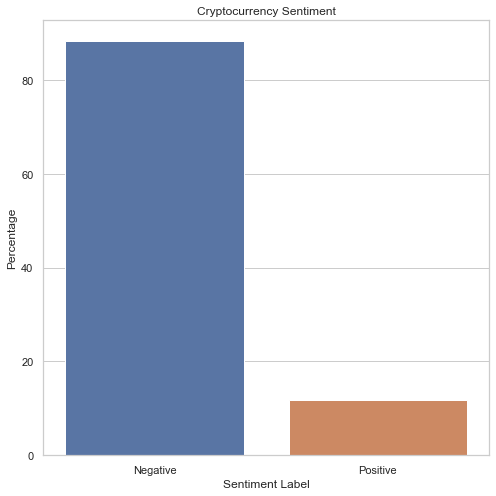

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('./data/senti_analysis/transformer_sentiment/cryptocurrency_FTXtrans_sentiment.csv')
counts = df.label.value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_title('Cryptocurrency Sentiment')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel('Sentiment Label')
ax.set_ylabel("Percentage")
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
trace_btc = go.Scatter(
    x= df.index,
    y=df['compound_btc'],
    name = "r/bitcoin",
    line = dict(color = '#17BECF'),
    opacity = 0.8,
    secondary_y=False)

trace_e = go.Scatter(
    x= df.index,
    y=df['compound_crypto'],
    name = "r/cryptocurrency" ,
    line = dict(color = '#7F7F7F'),
    opacity = 0.8,
    secondary_y=True)

data = [trace_btc, trace_e]

fig.add_trace(
    go.Scatter(
    x= df.index,
    y=df['compound_btc'],
    name = "r/bitcoin",
    line = dict(color = '#17BECF'),
    opacity = 0.8,
    secondary_y=False)
)

fig.add_trace(
    go.Scatter(
    x= df.index,
    y=df['compound_crypto'],
    name = "r/cryptocurrency" ,
    line = dict(color = '#7F7F7F'),
    opacity = 0.8,
    secondary_y=True)
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

In [169]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
start_date = dt.datetime(2022, 11, 6).timestamp()
end_date = dt.datetime(2022, 11, 23).timestamp()
df1 = pd.read_csv("./data/price_data/BTC_price.csv")
df2 = pd.read_csv("./data/senti_analysis/transformer_sentiment/bitcoin_FTXtrans_sentiment.csv")

df1 = df1[df1['timestamp'] >= start_date]
df1 = df1[df1['timestamp'] <= end_date]
df1['timestamp'] = df1['timestamp'] //3600 * 3600
df1 = df1.groupby('timestamp').mean()
df1 = df1.reset_index()
df1 = df1.rename(columns={'timestamp':'time'})
df1.head()
df2 = df2[df2['time'] >= start_date]
df2 = df2[df2['time'] <= end_date]
df2['time'] = df2['time'] //3600 * 3600
df2 = df2.groupby('time').mean()
df2 = df2.reset_index()
df2.head()


# df.index = pd.to_datetime(df.index, unit='s')
df = df1.merge(df2, on='time')

df.index = pd.to_datetime(df['time'], unit='s')
df.head()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close'],
    name = "BTC price",
    line = dict(color = '#17BECF'),
    opacity = 0.8
    ),secondary_y=False,)

fig.add_trace( go.Scatter(
    x=df.index,
    y=df['compound'],
    name = "sentiment",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8
    ),secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="BTC Price & r/bitcoin sentiment interactive chart with Double Y Axis"
)

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> BTC Price", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> r/bitcoin sentiment", secondary_y=True)
fig.show()
plotly.offline.plot(fig, filename='./visualization/sentiment interactive chart with Double Y Axis.html')

# fig = dict(data=data, layout=layout)
# iplot(fig, filename = "BTC & ETH Price Interactive Chart")
# plotly.offline.plot(fig, filename='Plotly_Stock.html')

'./visualization/sentiment interactive chart with Double Y Axis.html'

In [170]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
start_date = dt.datetime(2022, 11, 6).timestamp()
end_date = dt.datetime(2022, 11, 23).timestamp()
df1 = pd.read_csv("./data/price_data/BTC_price.csv")
df2 = pd.read_csv("./data/price_data/ETH_price.csv")

df1 = df1[df1['timestamp'] >= start_date]
df1 = df1[df1['timestamp'] <= end_date]
df1['timestamp'] = df1['timestamp'] //3600 * 3600
df1 = df1.groupby('timestamp').mean()
df1 = df1.reset_index()
df1.head()
df2 = df2[df2['timestamp'] >= start_date]
df2 = df2[df2['timestamp'] <= end_date]
df2['timestamp'] = df2['timestamp'] //3600 * 3600
df2 = df2.groupby('timestamp').mean()
df2 = df2.reset_index()
df2.head()


# df.index = pd.to_datetime(df.index, unit='s')
df = df1.merge(df2, on='timestamp')

df.index = pd.to_datetime(df['timestamp'], unit='s')
df.head()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close_x'],
    name = "BTC price",
    line = dict(color = '#17BECF'),
    opacity = 0.8
    ),secondary_y=False,)

fig.add_trace( go.Scatter(
    x=df.index,
    y=df['close_y'],
    name = "ETH price",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8
    ),secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="BTC & ETH Price interactive chart with Double Y Axis"
)

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> BTC Price", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> ETH Price", secondary_y=True)
fig.show()
plotly.offline.plot(fig, filename='./visualization/BTC & ETH Price interactive chart with Double Y Axis.html')

# fig = dict(data=data, layout=layout)
# iplot(fig, filename = "BTC & ETH Price Interactive Chart")
# plotly.offline.plot(fig, filename='Plotly_Stock.html')

'./visualization/BTC & ETH Price interactive chart with Double Y Axis.html'

In [167]:
import plotly.graph_objs as go
# from plotly import chart_studio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
# import plotly.plotly as py
import plotly
import pandas as pd
import datetime as dt
import chart_studio.plotly as py
start_date = dt.datetime(2022, 11, 6).timestamp()
end_date = dt.datetime(2022, 11, 23).timestamp()
df1 = pd.read_csv("./data/price_data/BTC_price.csv")
df2 = pd.read_csv("./data/price_data/FTT_price.csv")

df1 = df1[df1['timestamp'] >= start_date]
df1 = df1[df1['timestamp'] <= end_date]
df1['timestamp'] = df1['timestamp'] //3600 * 3600
df1 = df1.groupby('timestamp').mean()
df1 = df1.reset_index()
df1.head()
df2 = df2[df2['timestamp'] >= start_date]
df2 = df2[df2['timestamp'] <= end_date]
df2['timestamp'] = df2['timestamp'] //3600 * 3600
df2 = df2.groupby('timestamp').mean()
df2 = df2.reset_index()
df2.head()


# df.index = pd.to_datetime(df.index, unit='s')
df = df1.merge(df2, on='timestamp')

df.index = pd.to_datetime(df['timestamp'], unit='s')
df.head()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close_x'],
    name = "BTC price",
    line = dict(color = '#17BECF'),
    opacity = 0.8
    ),secondary_y=False,)

fig.add_trace( go.Scatter(
    x=df.index,
    y=df['close_y'],
    name = "FTT price",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8
    ),secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="BTC & FTT Price interactive chart with Double Y Axis"
)

# Set x-axis title
fig.update_xaxes(title_text="Time")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> BTC Price", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> FTT Price", secondary_y=True)
fig.show()
plotly.offline.plot(fig, filename='./visualization/BTC & FTT Price interactive chart with Double Y Axis.html')

# fig = dict(data=data, layout=layout)
# iplot(fig, filename = "BTC & ETH Price Interactive Chart")
# plotly.offline.plot(fig, filename='Plotly_Stock.html')

'./visualization/BTC & FTT Price interactive chart with Double Y Axis.html'